<a href="https://colab.research.google.com/github/HuyenNguyenHelen/INFO-5505---Machine-learning/blob/main/HuyenNguyen_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Dataset: monet.csv

Dependent variable: PRICE

In [35]:
# Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



## Load the dataset

In [13]:
# Open and load dataset
data = pd.read_csv('/content/monet.csv')
print('data shape: ', data.shape)
data.head(5)



data shape:  (430, 6)


,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2


## Create a new variable
Create a new variable by combining HEIGHT and WIDTH as sizes of pictures. This new variable will be used for LR models later.

In [14]:
# Create a new variable by combining HEIGHT AND WIDTH
data['SIZE'] = data['HEIGHT'] * data['WIDTH']
data.head(5)

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
0,3.993780,21.3,25.6,1,1,1,545.28
1,8.800000,31.9,25.6,1,2,2,816.64
2,0.131694,6.9,15.9,0,3,3,109.71
3,2.037500,25.7,32.0,1,4,2,822.40
4,1.487500,25.7,32.0,1,4,2,822.40


## Exploratory Analysis

### Explore missing values

In [15]:
# Investigate missing values
data.isnull().sum()

PRICE      0
HEIGHT     0
WIDTH      0
SIGNED     0
PICTURE    0
HOUSE      0
SIZE       0
dtype: int64

It shows that there is no missing values, so we do not need to have any imputing steps.

### Discriptive analysis
By having some discriptive analysis, we could have some senses of how our data vary over each variable in the dataset.

In [16]:
data.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE,SIZE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628,940.811558
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592,676.539289
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000,26.130000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000,637.902500
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000,816.640000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000,1036.605000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000,6193.690000


### Explore the distribution of the dependent variable - PRICE

In [17]:
# Explore the distribution of the dependent variable - PRICE
data['PRICE'].describe()

count    430.000000
mean       3.089996
std        4.311260
min        0.010413
25%        0.600153
50%        1.312782
75%        3.850000
max       33.013504
Name: PRICE, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


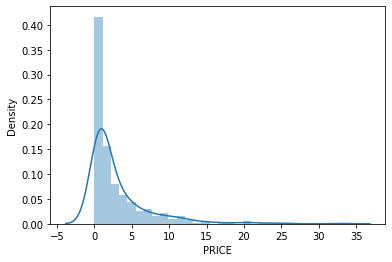

In [18]:
sns.distplot(data['PRICE'], bins = 30)

By looking into the shape of how the dependent variable distributes, we can see most of the density falls between 0 to 3 (thousand dollar). There may be some outliers that cost over 15 (thousand dollar). However, 

### Select independent variables
Linear Regression has continous data for its input and output. Therefore,  We explore input variables to see how they are correlated with the dependent variable. The Linear Regression is supposed to input the variable that are highly correlated with the target variable. That can be shown by visualizing their correlations in heatmap or scatter plot.

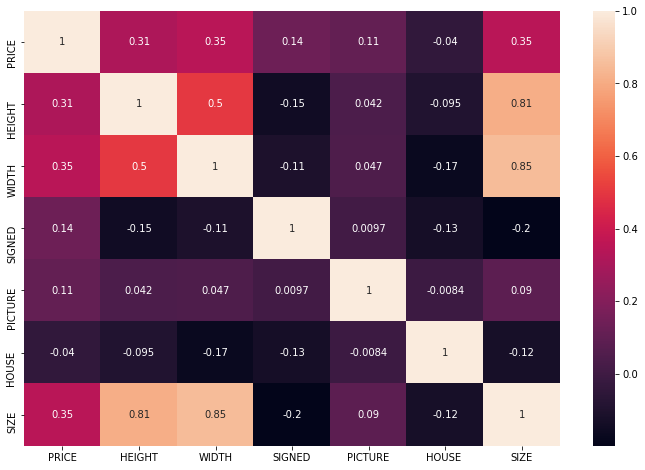

In [34]:
plt.subplots(figsize = (12,8))
sns.heatmap(data.corr(), annot=True)    # get correlation score matrix

The correlation score is from -1 to 1. The score value that is close to -1 shows a strong negative correlation whereas the score close to 1 indicates a strong positive correlation between two variables. If it is close to 0, the two variables are not correlated. From the heatmap, it seems that no variables are highly correlated with the dependent variable, PRICE. WIDTH and SIZE are most correlated (0.35), so they could be potential predictors of the models. We could use scatter plots to see their correlations more clearly. Further, HEIGHT and WIDTH certainly have co-linearity with SIZE since HEIGHT and WIDTH were combined to create SIZE. Therefore, we will not input either HEIGHT or WIDTH together with SIZE into the training model.

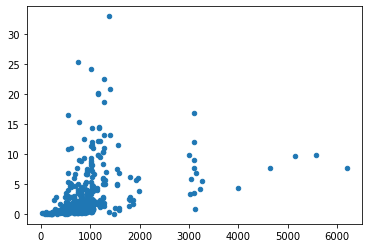

In [20]:
# Plot SIZE and PRICE 
plt.scatter (x= data['SIZE'], y = data['PRICE'], s=20)

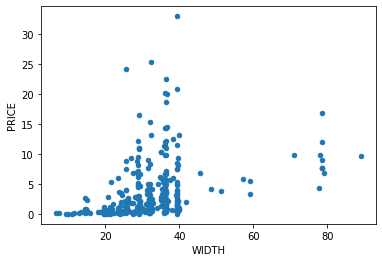

In [21]:
# Plot WIDTH and PRICE
data.plot.scatter(x='WIDTH', y = 'PRICE', s = 20)

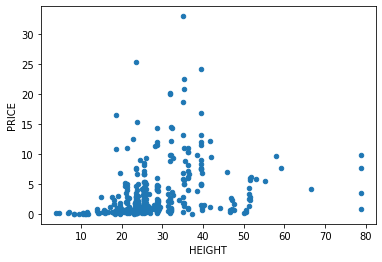

In [22]:
# Plot HEIGHT and PRICE
data.plot.scatter(x='HEIGHT', y = 'PRICE', s = 20)

# Linear Regression Models



X: variables known as independent variables, predictors, features

Y: variables known as dependent or target variable 

## Simple LR Models
Linear Regression has the line fit to data with a form: 
                                  y = ax+b

with a known as coefficient or slope and b as adjustment or intercept.
### Model 1
Single Indepedent variable X: SIZE

In [31]:
# Split dataset for training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['SIZE']], data['PRICE'], train_size = 0.8)

X_train.shape, y_train.shape

((344, 1), (344,))

In [32]:
# Build a LR model
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

# Fit the model into the training data
slr.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Apply the model to predict in the test set
y_pred = slr.predict (X_test) 


In [ ]:
# Evaluate the model
from sklearn import mean_square_error
mse = mean_square_error (y_train, y_pred)
r2 = r2_score ()